In [ ]:
!pip install scikit-learn matplotlib pandas

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

print("=== S.H.I.E.L.D FLOODSCOPE (2025) by Saad Ali ===")

=== S.H.I.E.L.D FLOODSCOPE (2025) by Saad Ali ===


Upload CSV file with columns: id,elev,slope,lulc,soil,cn   create 37 rows:.  0=center, 1-36=6x6 grid)

Make a copy to proceed:
https://docs.google.com/spreadsheets/d/1IvLQsOliTf0UMMjvgj9D8yaozXSGRVr1quZ2IWoaBNQ/edit?usp=sharing

In [ ]:
## Run to upload CSV ##


uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
print(f"Loaded {len(df)} points\n{df.head()}")

Saving Values and Conditions - Sheet1(1).csv to Values and Conditions - Sheet1(1) (1).csv
Loaded 37 points
   id  elev  slope  lulc  soil     cn
0   0   155   3.00     1     3  79.00
1   1   157   2.44     1     1  93.25
2   2   151   5.83     3     3  78.11
3   3   148   1.66     2     3  76.14
4   4   163   2.69     1     3  76.82


Flood Risk Scoring and Diplay

In [ ]:
## FLOOD RISK SCORING ##


def flood_risk_score(row):
    score = 0
    # LOW ELEVATION = HIGH RISK
    if row['elev'] < df['elev'].quantile(0.33): score += 2
    # GENTLE SLOPE = HIGH RISK
    if row['slope'] < 3: score += 2
    elif row['slope'] < 9: score += 1
    # HIGH CURVE NUMBER = HIGH RUNOFF
    if row['cn'] > 75: score += 3
    elif row['cn'] > 70: score += 2
    elif row['cn'] > 65: score += 1
    # BUILT-UP LAND = HIGH RISK
    if row['lulc'] == 1: score += 2  # Built-up
    elif row['lulc'] == 3: score += 1  # Grass
    # POOR SOIL = HIGH RUNOFF
    if row['soil'] == 3: score += 2  # HSG-C
    elif row['soil'] == 2: score += 1  # HSG-B

    # 5 RISK CLASSES (0-4)
    return min(4, max(0, score//2))

df['risk'] = df.apply(flood_risk_score, axis=1)

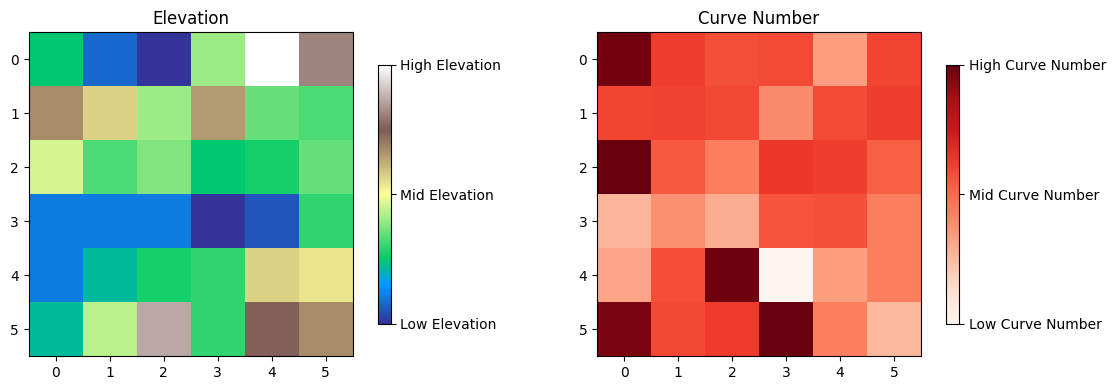

In [ ]:
## GRID VISUALIZATION ##


grid = df[df['id'].between(1,36)]['risk'].values.reshape(6,6)
center_risk = df.loc[0, 'risk']

fig, axes = plt.subplots(1,2 , figsize=(12,4))
cmap = ListedColormap(['#d9f0d3','#a1d99b','#41ab5d','#005a32','#003300'])

elev_min, elev_max = df['elev'].min(), df['elev'].max()
cn_min, cn_max = df['cn'].min(), df['cn'].max()

# Elevation Chart
im0 = axes[0].imshow(df[df['id'].between(1,36)]['elev'].values.reshape(6,6), cmap='terrain', vmin=elev_min, vmax=elev_max)
axes[0].set_title('Elevation')
cbar0 = fig.colorbar(im0, ax=axes[0], shrink=0.8)
cbar0.set_ticks([elev_min, (elev_min + elev_max)/2, elev_max])
cbar0.set_ticklabels(['Low Elevation', 'Mid Elevation', 'High Elevation'])

# Curve Number Chart
im1 = axes[1].imshow(df[df['id'].between(1,36)]['cn'].values.reshape(6,6), cmap='Reds', vmin=cn_min, vmax=cn_max)
axes[1].set_title('Curve Number')
cbar1 = fig.colorbar(im1, ax=axes[1], shrink=0.8)
cbar1.set_ticks([cn_min, (cn_min + cn_max)/2, cn_max])
cbar1.set_ticklabels(['Low Curve Number', 'Mid Curve Number', 'High Curve Number'])

plt.tight_layout()

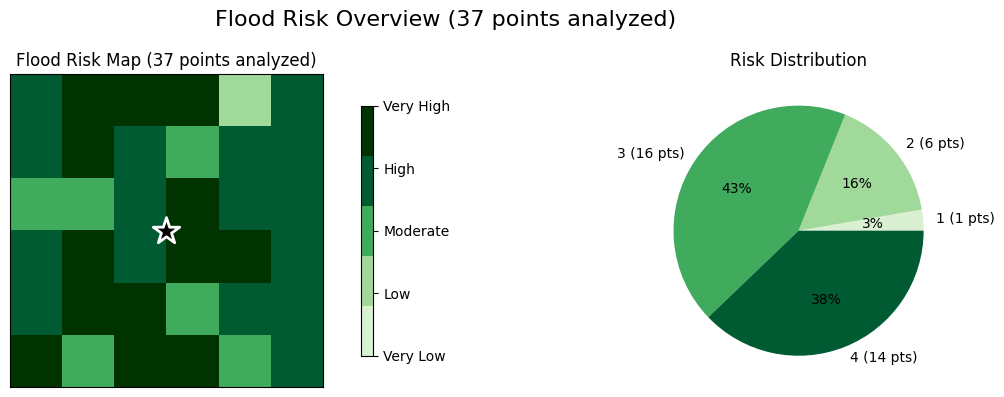

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# FLOOD RISK MAP AND RISK DISTRIBUTION SIDE-BY-SIDE

grid = df[df['id'].between(1,36)]['risk'].values.reshape(6,6)
center_risk = df.loc[0, 'risk']

risk_cmap = ListedColormap(['#d9f0d3','#a1d99b','#41ab5d','#005a32','#003300'])

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

im = axes[0].imshow(grid, cmap=risk_cmap, vmin=0, vmax=4)
axes[0].scatter(2.5, 2.5, c='black', s=400, marker='*', edgecolors='white', linewidths=2)
axes[0].set_title(f'Flood Risk Map ({len(df)} points analyzed)')
axes[0].set_xticks([])
axes[0].set_yticks([])

cbar = fig.colorbar(im, ax=axes[0], ticks=[0,1,2,3,4], shrink=0.8)
cbar.ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])

# Define risk_counts before using it
risk_counts = df['risk'].value_counts().sort_index()

axes[1].pie(risk_counts.values, labels=[f'{i} ({v} pts)' for i,v in risk_counts.items()],
              colors=risk_cmap.colors, autopct='%1.0f%%')
axes[1].set_title('Risk Distribution')

fig.suptitle(f'Flood Risk Overview ({len(df)} points analyzed)', fontsize=16)

plt.tight_layout()

plt.savefig('flood_risk_overview.png', dpi=300, bbox_inches='tight')
plt.show()

df.to_csv('flood_risk_results.csv', index=False)
files.download('flood_risk_results.csv')
files.download('flood_risk_overview.png')

In [ ]:
## SUMMARY ##


risk_counts = df['risk'].value_counts().sort_index()

df.to_csv('flood_risk_results.csv', index=False)
files.download('flood_risk_results.csv')

print("\n ANALYSIS COMPLETE")
print(df[['id','elev','slope','cn','risk']].round(1))
print(f"\nCenter point risk: {center_risk}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 ANALYSIS COMPLETE
    id  elev  slope    cn  risk
0    0   155    3.0  79.0     4
1    1   157    2.4  93.2     3
2    2   151    5.8  78.1     4
3    3   148    1.7  76.1     4
4    4   163    2.7  76.8     4
5    5   185    3.9  66.3     1
6    6   178    3.4  77.3     3
7    7   173    6.8  77.3     3
8    8   169    2.8  77.7     4
9    9   163    3.7  77.0     3
10  10   172    6.9  69.0     2
11  11   161    2.8  76.8     3
12  12   160    4.8  78.1     3
13  13   165    4.1  94.2     2
14  14   160    3.3  75.0     2
15  15   162    3.6  70.5     3
16  16   157    4.2  79.0     4
17  17   158    4.0  78.1     3
18  18   161    1.6  74.4     3
19  19   152    2.4  63.7     3
20  20   152    2.6  68.6     4
21  21   152    2.8  64.7     3
22  22   148    2.8  75.8     4
23  23   150    4.5  76.1     4
24  24   159    3.2  70.4     3
25  25   152    3.0  65.7     3
26  26   156    1.9  76.3     4
27  27   158    3.2  93.5     4
28  28   159    3.0  52.4     2
29  29   169    2.2 